<img src='Image/CBG18.png' width="220px" align="right"> <img src='Image/uff-logo.png' width="200px" align="left"> <img src='Image/logon.jpg' width="200px" align="center"> 

# Synthetic data: a Vertical Prism ( dike model )
### Compute the gravity attraction produced by a dike model (approximated by a vertical prism)
**Reference: Blakely (1996) - Potencial Theory in Gravity and Magnetic Aplications**

In [1]:
# Importing all usefull internal python libraries:
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
%matplotlib tk
#%matplotlib inline

In [2]:
# importing particular functions implemented by us:
from modules.prism import prism_gz
from modules.plots import draw_prism, rectangle
from modules.numerics import addnoise

In [3]:
# Positions and number of points
nx = 100
ny = 100

# define the x and y ranges:
x = np.linspace(-5000., 5000.0, nx) # meters
#y = np.copy(x) # for identical axis
y = np.linspace(-3000.0, 3000.0, ny)
z = -100.0  #np.linspace(-20., -20.0, nx)  # meters (flight hight)

# Computes the mesh of all points
X, Y  = np.meshgrid(x, y)

In [4]:
# Setting the parameters for prism
# dike = [xmin(m), xmax(m) , ymin(m), ymax(m), zmin(m), zmax(m), dens(km/m3)]
dike = [-500., 500., -500., 500., 2000., 5000., 2900.0] 

In [5]:
# create data frame with pandas to save data file:
columns=['xmin','xmax','ymin', 'ymax', 'zmin', 'zmax', 'density(kg/m3)']
datadike = pd.DataFrame( [dike], columns=columns)
datadike.to_csv("Synthetic/dike_model.txt", sep = ' ', index = False, header = True)

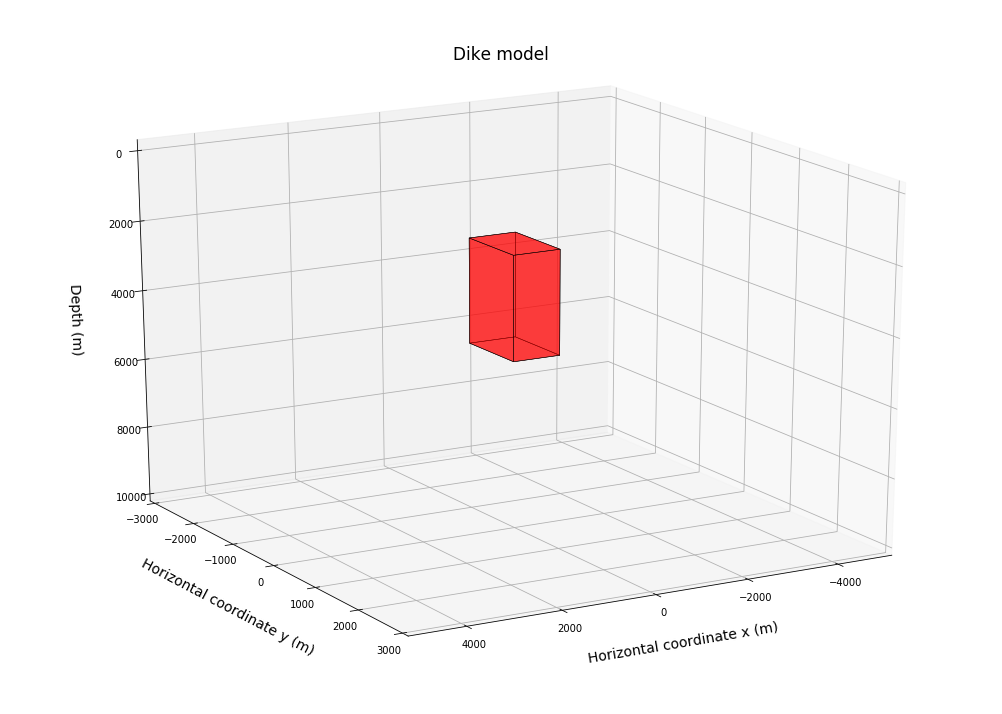

In [6]:
# make the 3D plot for visualization of the model:
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d') # 3D boxplot where the figure goes
box = draw_prism( ax, dike )

# ----- labels (these should be used outside of the function!)
box.set_xlabel('Horizontal coordinate x (m)', labelpad=20 ,fontsize=14)
box.set_ylabel('Horizontal coordinate y (m)', labelpad=20 ,fontsize=14)
box.set_xlim( min(x), max(x) )
box.set_ylim( min(y), max(y) )
box.set_zlim(-100,10000)
box.set_zlabel('Depth (m)', labelpad=20 ,fontsize=14, rotation = 90)

#visualization angle
box.view_init(20, 60)
box.invert_zaxis()
plt.title('Dike model', fontsize=17)
plt.tight_layout(True)

In [7]:
# Calculating the gravity components
gz = prism_gz(X, Y, z, dike)

In [8]:
# Adicionar ruido aos dados, visando simular a realidade das medidas:
gz_noise = addnoise(gz, 0.1, 0.05)

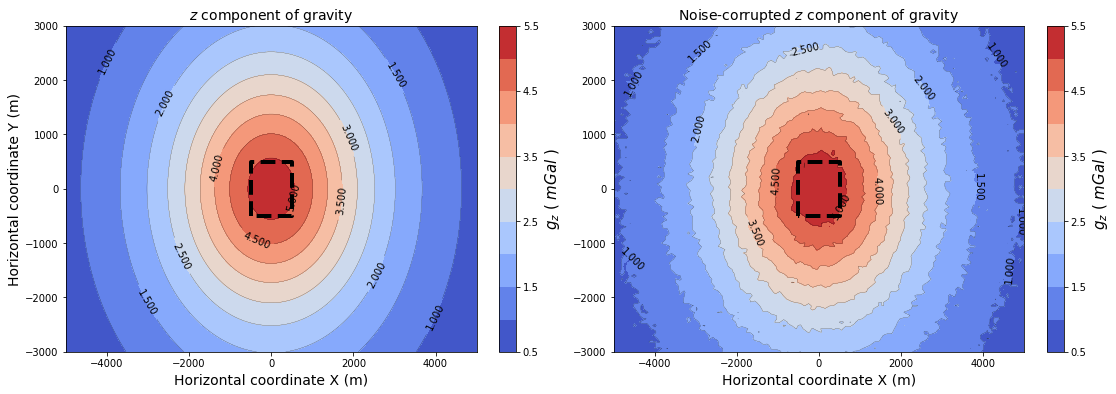

In [9]:
# Ploting all results obtained so far:
plt.close('all')
%matplotlib inline
plt.figure(figsize=(18,6))
fs = 14
#############################################################################
#-------------------- Plot the data produced by the dike model: --------------------
ax1 = plt.subplot(1, 2, 1)
plt.title('$z$ component of gravity ', fontsize = fs)

p = ax1.contour(X, Y, gz, 10, colors='k', linewidths = 0.2, vmin=np.min(gz_noise), vmax=np.max(gz_noise) )
# display the lines and the respective value of each line:
plt.clabel(p, inline=1, fontsize=10) #(only work for contour command!!!!!!)

p1 = ax1.contourf(X, Y, gz, 10, cmap = plt.cm.coolwarm, vmin = np.min(gz_noise), vmax = np.max(gz_noise))
cbar = plt.colorbar(p1, aspect=20, fraction = 0.05, orientation="vertical")
cbar.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 90)

# ------ plot the contour of the dike as a background image--------------------:
rectangle(ax1, dike[0:4], style='--k', linewidth=4, fill= None, alpha=1., label=None)
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)
#############################################################################
ax2 = plt.subplot(1, 2, 2)
plt.title('Noise-corrupted $z$ component of gravity ', fontsize = fs)

p = ax2.contour(X, Y, gz_noise, 10, colors='k', linewidths = 0.2, vmin=np.min(gz_noise), vmax=np.max(gz_noise) )
# display the lines and the respective value of each line:
plt.clabel(p, inline=1, fontsize=10) #(only work for contour command!!!!!!)

p2 = ax2.contourf(X, Y, gz_noise, 10, cmap = plt.cm.coolwarm, vmin = np.min(gz_noise), vmax = np.max(gz_noise))
cbar = plt.colorbar(p2, aspect=20, fraction = 0.05, orientation="vertical")
cbar.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 90)

# ------ plot the contour of the dike as a background image--------------------:
rectangle(ax2, dike[0:4], style='--k', linewidth=4, fill= None, alpha=1., label=None)
#plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

plt.show()

In [10]:
############ set output file to be used in another script ###########:
Xn = np.reshape(X, (nx*ny) )
Yn = np.reshape(Y, (nx*ny) )
GZ = np.reshape(gz_noise, (nx*ny) )
elev = np.linspace(z,z,nx*ny)

# create data frame with pandas to save data file:
columns=['X(m)','Y(m)','elev(m)', 'gz(mgal)']
data = np.transpose( (Xn, Yn, elev, GZ) )
data = pd.DataFrame(data, columns=columns)
#print data
data.to_csv("Synthetic/synthetic_data.txt", index=False, encoding='utf8', sep = ' ')

#  <center> 3D Plot of model and data in slice <center>

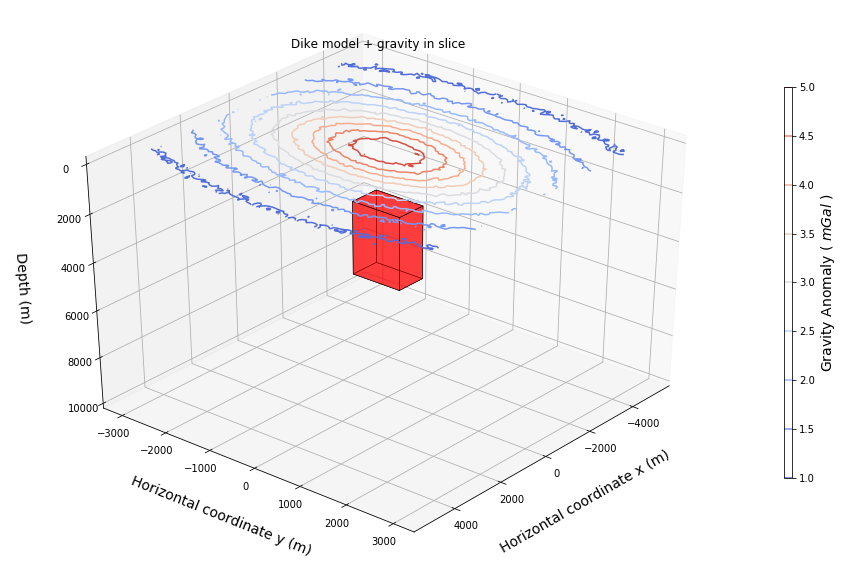

In [11]:
# ----------------Make the 3D plot for visualization of the model ------------------------:
plt.close('all')
py.rcParams['contour.negative_linestyle'] = 'dashed'
%matplotlib tk
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d') # 3D boxplot where the figure goes

# plot the dike and store it in pbox plotting object:
pbox = draw_prism(ax, dike)

# ----- define labels and limits of the plotbox:
pbox.set_xlabel('Horizontal coordinate x (m)', labelpad=20 ,fontsize=14)
pbox.set_ylabel('Horizontal coordinate y (m)', labelpad=20 ,fontsize=14)
box.set_xlim( min(x), max(x) )
box.set_ylim( min(y), max(y) )
pbox.set_zlim(-100,10000)
pbox.set_zlabel('Depth (m)',labelpad=20 ,fontsize=14, rotation = 90)
pbox.set_title('Dike model + gravity in slice')
pbox.view_init(35, 40)

# put z downward
pbox.invert_zaxis()

# ------------------- vertical gravitational atraction produced by the dike ------------------:
p1 = pbox.contour(X, Y, gz_noise, 10, zdir='z', 
                offset=z, cmap='coolwarm', vmin = np.min(gz_noise), vmax = np.max(gz_noise) )
cbar1 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
cbar1.set_label('Gravity Anomaly ( $ mGal $ )',fontsize=fs, rotation = 90)
plt.show()

# <center> END OF THE SCRIPT THAT GENERATES SYNTHETIC GRAVITY DATA <center>